In [1]:
import json
from matplotlib import pyplot as plt
import pandas as pd
import calendar
import numpy as np
from tensorflow import nn
def polarity_index(x):
    """Softmax reduces the weight of positives and negatives if neutral is high."""
    return np.sum(nn.softmax(x).numpy()*np.array([1,0,-1]))

In [5]:
with open('../flat_files/telegram_polarities.json', 'r') as f:
    polarities = json.load(f)

polarity_df = pd.DataFrame(polarities)

polarity_df[['positive', 'neutral', 'negative']] = pd.DataFrame(polarity_df['polarity'].to_list(), index=polarity_df.index)
polarity_df = polarity_df.drop('polarity', axis=1)
polarity_df['positive']=polarity_df['positive'].astype(float)
polarity_df['neutral']=polarity_df['neutral'].astype(float)
polarity_df['negative']=polarity_df['negative'].astype(float)
polarity_df['date'] = pd.to_datetime(polarity_df['date'], format='%Y%m%d')
polarity_df_mean = polarity_df.groupby(polarity_df['date']).mean().reset_index()
polarity_df_mean = polarity_df_mean.set_index('date')

# Kyiv Independent Average Polarity
<small> In this context we define polarity as the tendency to make either
emotional statements or to focus on negative or positive aspects of news rather
than the factual side.

In the following graph we can observe a bigger divide between positive/neutral messaging
and negative messaging. This means that this channel makes little negative statements.
The high and similar values for positive and neutral messaging indicate either
uncertainty for classification, or high positive or neutral message counts.

A minimal trend for more negative messaging can be observed over time. The opposite can be said for positive messaging.
neutral messaging is more or less the same.
This might have to do with war tiredness but as well as having established
"audience" which allows for greater subjectivity in media whlist retaining support.
</small>

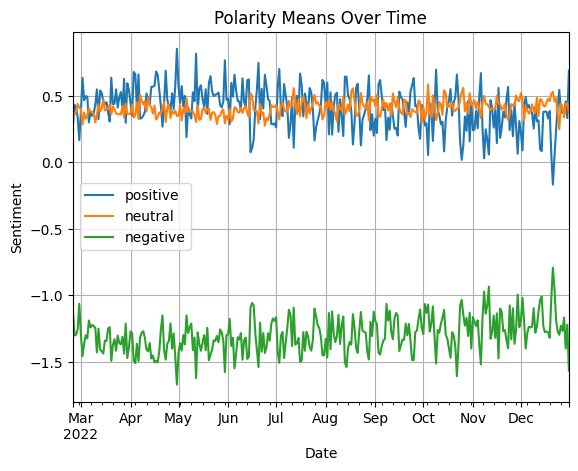

In [6]:
ax = polarity_df_mean.plot(kind='line', title='Polarity Means Over Time', grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
plt.show()

In [7]:
polarity_df_max = polarity_df.groupby(polarity_df['date']).max().reset_index()
polarity_df_max = polarity_df_max.set_index('date')

# Kyiv Independent Max Polarity
<small>
This graph shows the most polarizing (as in with highest polarity) statements that were
made during the day. Interestingly negative statements seem to spike at the beginning of each
month. It's difficult to rationalize the real-world reason.
</small>

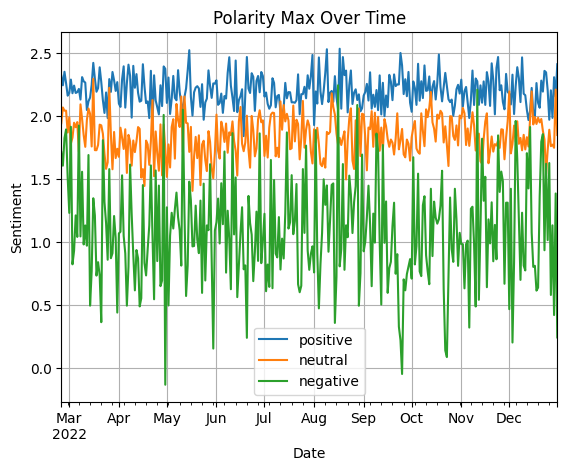

In [8]:
ax = polarity_df_max.plot(kind='line', title='Polarity Max Over Time', grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')
plt.show()

In [9]:
polarity_index_df = pd.DataFrame()
polarity_index_df['date'] = polarity_df['date'].copy()
polarity_index_df['polarity']=polarity_df[['positive', 'neutral', 'negative']].apply(polarity_index, axis=1)

polarity_index_df_mean = polarity_index_df.groupby(polarity_index_df['date']).mean().reset_index()
polarity_index_df_mean = polarity_index_df_mean.set_index('date')

# Polarity Index
<small> Polarity index is an index that unifies the previous three metrics.
1 being the very positive messages and -1 being the very negative messages.

As can be observed in the graph, the average polarity falls down in time,
which indicates that the messages become more neutral or more negative.
Together with the first graph we can conclude the latter.
</small>

Text(0, 0.5, 'Sentiment')

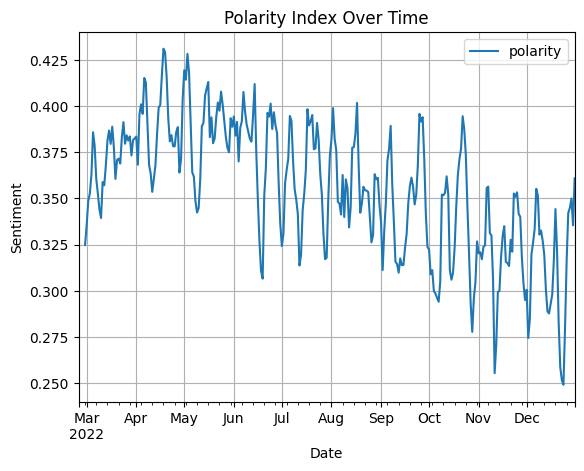

In [10]:
smoothed = polarity_index_df_mean.rolling(window=5).mean()
ax = smoothed.plot(kind='line', title='Polarity Index Over Time', grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment')